## Project 4 - YouTube Video Metric Clustering

## Introduction

In this project, I will be utilizing clustering to look at a dataset of YouTube video metrics. I want to be able to see if this data can be split into distinctive clusters by just looking at YouTube video metrics, such as its views, shares, likes, and more. 

Thinking back on my own experiences with watching videos on YouTube, I do notice certain types of videos and how their views tend to potentially "cluster" together. When I click on a video, it's usually one of about three things: A viral/trending video, a video by someone I subscribe to, or it's a video that I specifically searched of a niche thing like how to fix a technical issue on a computer. I want to know if there truly are clusters of videos depending on their metrics and if there are, how many distinct clusters are there?

So, for my overall question that I would like to solve this project: 

<b>Can videos be grouped without genre, creator, or other metadata, and simply by how they perform?</b>

## Clustering

Before I introduce my dataset and start pre-processing it, I'm going to explain a little bit about what clustering is.

Clustering is a form of machine learning that is unsupervised, which means that the chosen clustering algorithm doesn't need any labels or tags on the data to be able to sort it into different groups of data. As a result, clustering can find common characteristics in data that is not or was not visible to other algorithms. 

In this project, I'm going to be using two different algorithms and methods of clustering, K-means clustering and agglomerative clustering.

K-Means clustering involves picking a number of clusters and plotting them in a plane. From there, center points are assigned to the clusters of data that appear. From there, the center points are recalculated based on new data and adjust to be in the center of the cluster and continue to reiteratively adjust themselves until they no longer are moving and have found their true center over a cluster of data.

Agglomerative clustering is a different way to cluster data, and involves hierarchy. To summarize, data, when initially thrown into this algorithm, starts as its own cluster, then combines with other similar data. When these data points merge together, they are making new clusters, while decreasing the overall number of clusters. The combination of clusters can be plotted out using a dendrogram and will eventually cluster all data into one. From there, we can decide how many clusters we want to visualize out of the data.

## Introducing the Data

The data I've found for this project can be found on Kaggle <a href="https://www.kaggle.com/datasets/thedevastator/youtube-analytics-how-to-keep-your-viewers-engag">here</a>. There are a few different csv files to pick from with metric data about YouTube videos, but I'll be using just one csv to keep things simple. I'll be pulling from the Aggregated_Metrics_By_Video.csv file. The Videos used in this dataset are mostly all technology/data science themed uploaded between June 2017 and January 2022 and are real videos pulled from YouTube.

This file includes metrics such as:

<ul>
    <li>Comments added: The number of comments on the video</li>
    <li>Views: The number of views the video has</li>
    <li>Shares: The number of times the video was shared</li>
    <li>Likes: The number of likes the video has</li>
    <li>Dislikes: The number of dislikes the video has</li>
    <li>RPM (USD): The revenue per thousand views the video has</li>
    <li>CPM (USD): The cost per thousand views the vidoe has</li>
    <li>Watch time (hours): The total number of hours the video has been watched.</li>
</ul>

Basically, this file does not include any other metadata that could explain these metrics, such as if the video was from a popular creator or was just a viral video, and it just has the metrics themselves.

## Data Understanding / Pre-Processing

Before getting super into the clustering of the data, I'll explore it a little bit and see if I can notice any trends in the data. I'll also do some pre-processing to clean the dataset before trying to visualize.

In [1]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("Aggregated_Metrics_By_Video.csv")
dataset

,Video,Video title,Video pub­lish time,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Av­er­age view dur­a­tion,Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
0,Total,NaN,NaN,14197,39640,3902,225021,45790,229241,5.276,11.990,26.61,0:03:25,5568487,317602.3536,183451,29068.652,100954064,3.16
1,4OZip0cgOho,How I Would Learn Data Science (If I Had to St...,"May 8, 2020",907,9583,942,46903,451,46904,6.353,12.835,36.65,0:03:09,1253559,65850.7042,46453,7959.533,26498799,3.14
2,78LjdAAw0wA,100K Channel Update + AMA Stream!,"Nov 12, 2020",412,4,4,130,15,12,2.668,6.259,6.26,0:05:14,2291,200.2966,-3,6.113,188318,0.72
3,hO_YKK_0Qck,Uber Driver to Machine Learning Engineer in 9 ...,"Jul 16, 2020",402,152,15,881,9,198,9.516,11.695,15.12,0:10:21,21350,3687.3387,189,202.963,442334,2.53
4,uXLnbdHMf8w,Why I'm Starting Data Science Over Again.,"Aug 29, 2020",375,367,22,2622,40,1957,3.143,7.943,33.41,0:02:36,49564,2148.3110,1917,155.779,521185,4.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,FBgs-BSTIJE,Demystifying Data Science Roles,"Nov 30, 2018",3,5,1,48,1,8,5.218,16.232,55.55,0:03:28,978,56.5930,7,5.103,26202,2.24
220,Yr5T3T4tq-g,Most Data Science Hopefuls Overlook This Impor...,"May 25, 2019",3,0,0,44,0,5,3.374,15.596,58.62,0:02:06,548,19.2752,5,1.849,21780,1.61
221,j-Z-je6K4Yg,IT'S NOT TOO LATE TO LEARN CODE!,"Dec 18, 2018",3,1,0,35,0,7,3.784,12.590,60.52,0:01:52,721,22.5450,7,2.728,18635,2.65
222,5jntoZX-Tc8,NASA Physicist Turned Data Scientist (Tim Bowl...,"May 5, 2019",2,5,0,38,0,3,2.651,12.206,16.93,0:03:09,1094,57.6363,3,2.900,34642,1.99


So, first thing is to whack off columns that I don't want or need.

The first row is actually a total of all the others, so we're going to delete that.

In [2]:
dataset = dataset.drop(labels = 0, axis = 0)

In [3]:
list(dataset.columns)

['Video',
 'Video title',
 'Video pub\xadlish time',
 'Com\xadments ad\xadded',
 'Shares',
 'Dis\xadlikes',
 'Likes',
 'Sub\xadscribers lost',
 'Sub\xadscribers gained',
 'RPM (USD)',
 'CPM (USD)',
 'Av\xader\xadage per\xadcent\xadage viewed (%)',
 'Av\xader\xadage view dur\xada\xadtion',
 'Views',
 'Watch time (hours)',
 'Sub\xadscribers',
 'Your es\xadtim\xadated rev\xaden\xadue (USD)',
 'Im\xadpres\xadsions',
 'Im\xadpres\xadsions click-through rate (%)']

In [4]:
#whacky "\xad" stuff was giving me trouble dropping columns
dataset = dataset.drop(['Video', 'Video title', 'Video pub\xadlish time', 'Sub\xadscribers lost', 
                        'Sub\xadscribers gained', 'Av\xader\xadage per\xadcent\xadage viewed (%)', 
                        'Av\xader\xadage view dur\xada\xadtion', 'Sub\xadscribers', 
                        'Your es\xadtim\xadated rev\xaden\xadue (USD)', 'Im\xadpres\xadsions', 
                        'Im\xadpres\xadsions click-through rate (%)'], axis=1)

In [5]:
dataset

,Com­ments ad­ded,Shares,Dis­likes,Likes,RPM (USD),CPM (USD),Views,Watch time (hours)
1,907,9583,942,46903,6.353,12.835,1253559,65850.7042
2,412,4,4,130,2.668,6.259,2291,200.2966
3,402,152,15,881,9.516,11.695,21350,3687.3387
4,375,367,22,2622,3.143,7.943,49564,2148.3110
5,329,118,15,590,2.973,7.425,13429,1034.3945
...,...,...,...,...,...,...,...,...
219,3,5,1,48,5.218,16.232,978,56.5930
220,3,0,0,44,3.374,15.596,548,19.2752
221,3,1,0,35,3.784,12.590,721,22.5450
222,2,5,0,38,2.651,12.206,1094,57.6363


In [6]:
list(dataset.columns)

['Com\xadments ad\xadded',
 'Shares',
 'Dis\xadlikes',
 'Likes',
 'RPM (USD)',
 'CPM (USD)',
 'Views',
 'Watch time (hours)']

In [7]:
#I'm going to fix the two columns with "\xad" in it before starting
dataset.rename(columns = {'Com\xadments ad\xadded':'Comments added', 'Dis\xadlikes':'Dislikes'}, inplace=True)

In [8]:
list(dataset.columns)

['Comments added',
 'Shares',
 'Dislikes',
 'Likes',
 'RPM (USD)',
 'CPM (USD)',
 'Views',
 'Watch time (hours)']

In [9]:
dataset.isna().sum()

Comments added        0
Shares                0
Dislikes              0
Likes                 0
RPM (USD)             0
CPM (USD)             2
Views                 0
Watch time (hours)    0
dtype: int64

In [10]:
#Since there are only two nulls, I'll just remove those two rows.
dataset = dataset.dropna(axis=0)

In [11]:
dataset.isna().sum()

Comments added        0
Shares                0
Dislikes              0
Likes                 0
RPM (USD)             0
CPM (USD)             0
Views                 0
Watch time (hours)    0
dtype: int64

I'm also going to use Standard Scaler from scikit to standardize my data because some of it isn't in the same scale (RPM, CPM) as the others (Views, etc).

In [12]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit_transform(dataset)
dataset_scaled = pd.DataFrame(scale, columns = dataset.columns)
dataset_scaled

,Comments added,Shares,Dislikes,Likes,RPM (USD),CPM (USD),Views,Watch time (hours)
0,9.196851,12.797510,13.258248,12.799840,1.073662,0.418253,13.681471,13.382358
1,3.796768,-0.238564,-0.195612,-0.247518,-1.036712,-1.553811,-0.254939,-0.256918
2,3.687675,-0.037151,-0.037837,-0.038026,2.885090,0.076381,-0.042663,0.467537
3,3.393125,0.255443,0.062565,0.447627,-0.764682,-1.048800,0.271580,0.147794
4,2.891299,-0.083421,-0.037837,-0.119200,-0.862040,-1.204142,-0.130885,-0.083629
...,...,...,...,...,...,...,...,...
216,-0.654210,-0.237203,-0.252984,-0.275413,0.294227,7.900762,-0.266811,-0.296532
217,-0.665119,-0.237203,-0.238641,-0.270392,0.423655,1.436973,-0.269562,-0.286773
218,-0.665119,-0.244008,-0.252984,-0.271507,-0.632390,1.246244,-0.274352,-0.294526
219,-0.665119,-0.242647,-0.252984,-0.274018,-0.397586,0.344780,-0.272425,-0.293847


Ok, now I've removed and fixed up my columns, I'm going to visualize some of the features against each other to see if they have any potential relationship to begin with that perhaps the clustering algorithms can utilize later. I'll also utilize a heatmap to notice correlations.

<AxesSubplot:>

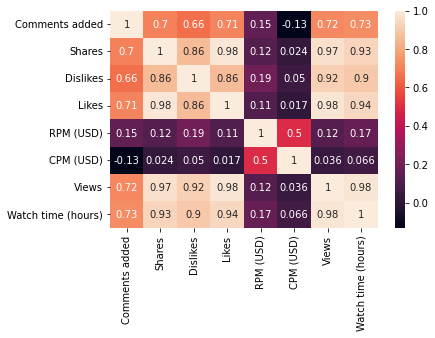

In [15]:
import seaborn as sns
import matplotlib as plt
corr = dataset_scaled.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:xlabel='Dislikes', ylabel='Likes'>

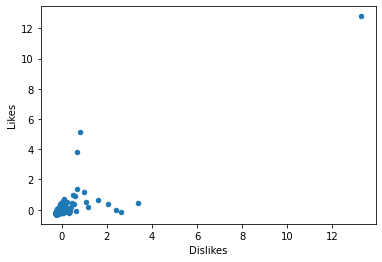

In [16]:
dataset_scaled.plot(x = "Dislikes", y = "Likes", kind="scatter")

<AxesSubplot:xlabel='Views', ylabel='Likes'>

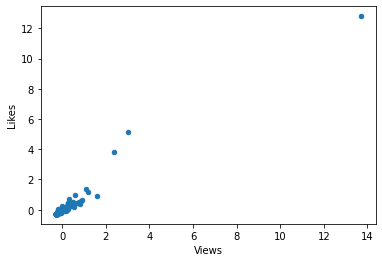

In [17]:
dataset_scaled.plot(x = "Views", y = "Likes", kind="scatter")

Now these are starting to give a clearer picture. There are definitely some correlations present in the heatmap, like Shares and Likes, so I'm curious to find out how the clustering models are going to handle this data. Even out of two relationships that I plotted, Views and Likes visually seems to have a positive relationship with each other, but with the rest of the data, does this persist, and can this help to cluster?

The last step of pre-processing I'm going to do is using PCA to reduce the dimensionality down to 2. This will allow for better visualizations later with the clustering.

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
dataset_pca = pca.fit_transform(dataset_scaled)
dataset_pca = pd.DataFrame(dataset_pca)
dataset_pca

,0,1
0,30.827970,-0.924571
1,0.687853,-2.181323
2,1.633366,1.671102
3,1.580684,-1.648491
4,0.706790,-1.731063
...,...,...
216,-0.617366,5.968807
217,-0.713397,1.410355
218,-0.817694,0.550700
219,-0.813683,0.063095


## Modeling

Ok, now time to jump into the modeling phase of the project. To reiterate, I'm going to be using both K-means clustering and agglomerative hierarcal clustering to see if this data can be clustered into distinctive groups.

** From here I'm going to use the graphs needed to find ideal number of clusters for both K-means and agglomerative then use the models, then discuss results **

## Sources

<ul>
    <li>https://www.kaggle.com/datasets/thedevastator/youtube-analytics-how-to-keep-your-viewers-engag</li>
    <li>https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68</li>
</ul>